### 1. Setup and Data Loading
   
   In this section we will:
   1. Import Basic libraries
   2. upload and load heart.csv file
   3. take a first look at the data

In [1]:
# Import necessary Libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt   
import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)

# from google.colab import files

In [2]:
# Upload heart.csv from your computer
#upload = files.upload()

# The kaggle file is named heart.csv
df = pd.read_csv("../Data_files/heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
# Basic info about rows, columns and data types
print("Shape: ", df.shape)

Shape:  (918, 12)


In [4]:
print("Info: ")
df.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Quick descriptive statistics for numeric columns. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### 2. Define Target and Feature Types
we will explicitely define which columns are numeric and which are categorical. This helps keep the rest of the notebook clean and error prone.

In [6]:
# Define Target and Feature Types
target_col = "HeartDisease"
numerical_cols = ["Age", "RestingBP", "Cholesterol","FastingBS", "MaxHR", "Oldpeak"]
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
print(target_col)
print(numerical_cols)
print(categorical_cols)

HeartDisease
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### 3. Missing Values and Basic Quality Check

In [7]:
# Check missing values count per column
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Look at some basic value ranges
# numerical value basics
df[numerical_cols].agg(["min","max","mean","median"]).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [9]:
# categorical value basics
for c in categorical_cols:  
    print(c, df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


### 4. Understanding Distributions with Histograms and Boxplots

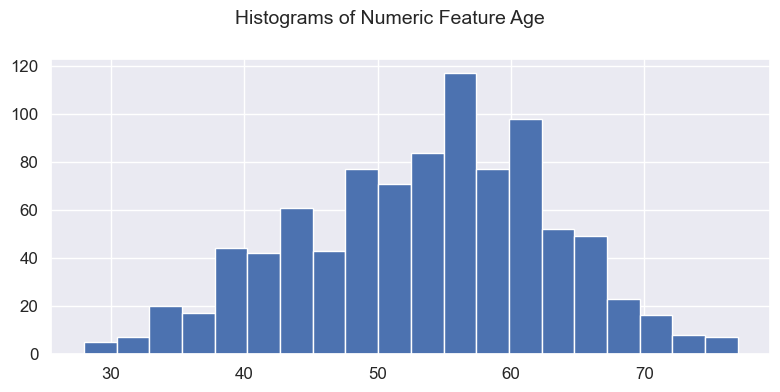

In [10]:
# Histogram from numerical features
df["Age"].hist(bins=20, figsize=(8,4))
plt.suptitle("Histograms of Numeric Feature Age", fontsize = 14)
plt.tight_layout() 
plt.show() 

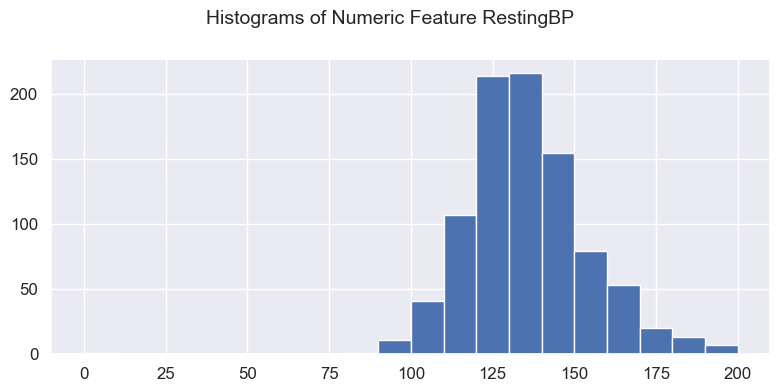

In [11]:
df["RestingBP"].hist(bins=20, figsize=(8,4))
plt.suptitle("Histograms of Numeric Feature RestingBP", fontsize = 14)
plt.tight_layout() 
plt.show() 

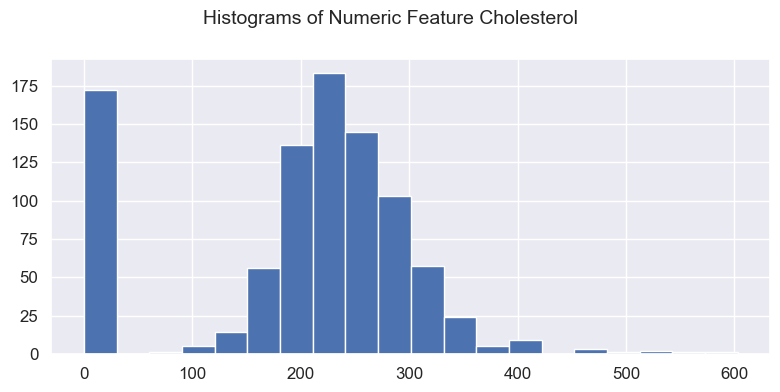

In [12]:
df["Cholesterol"].hist(bins=20, figsize=(8,4))
plt.suptitle("Histograms of Numeric Feature Cholesterol", fontsize = 14)
plt.tight_layout() 
plt.show()

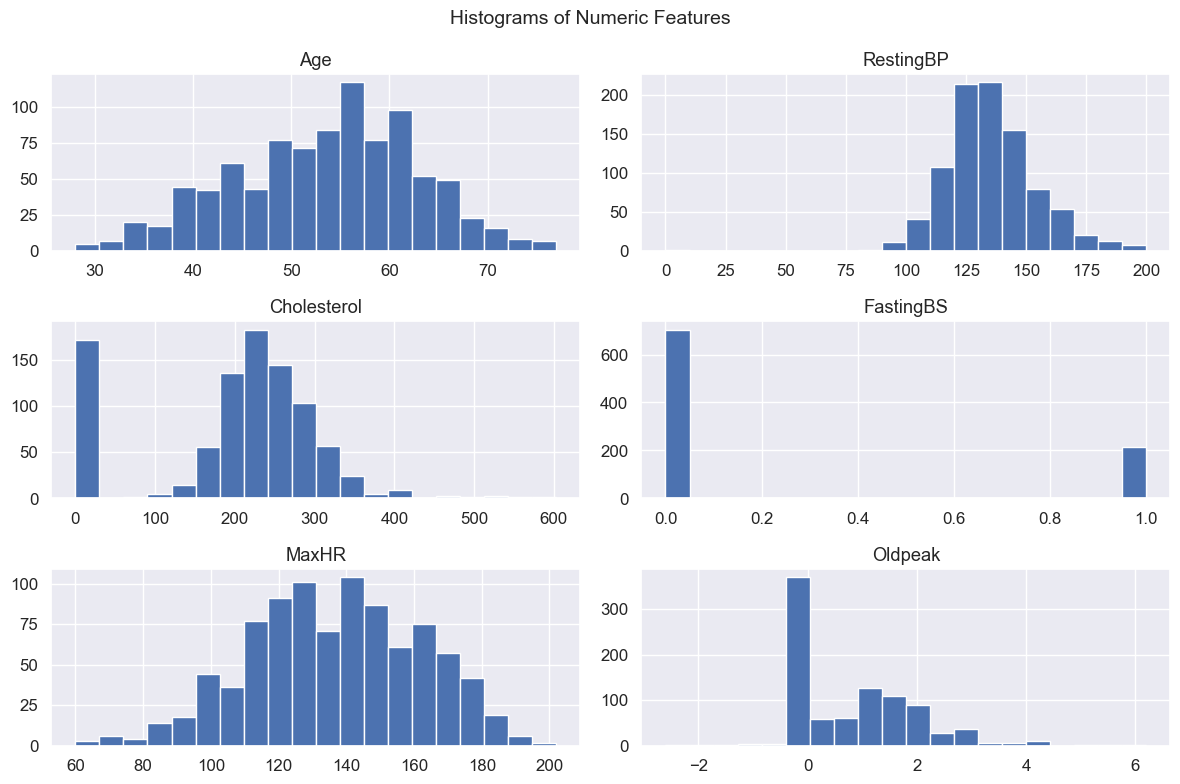

In [13]:
df[numerical_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numeric Features", fontsize = 14)
plt.tight_layout() 
plt.show()

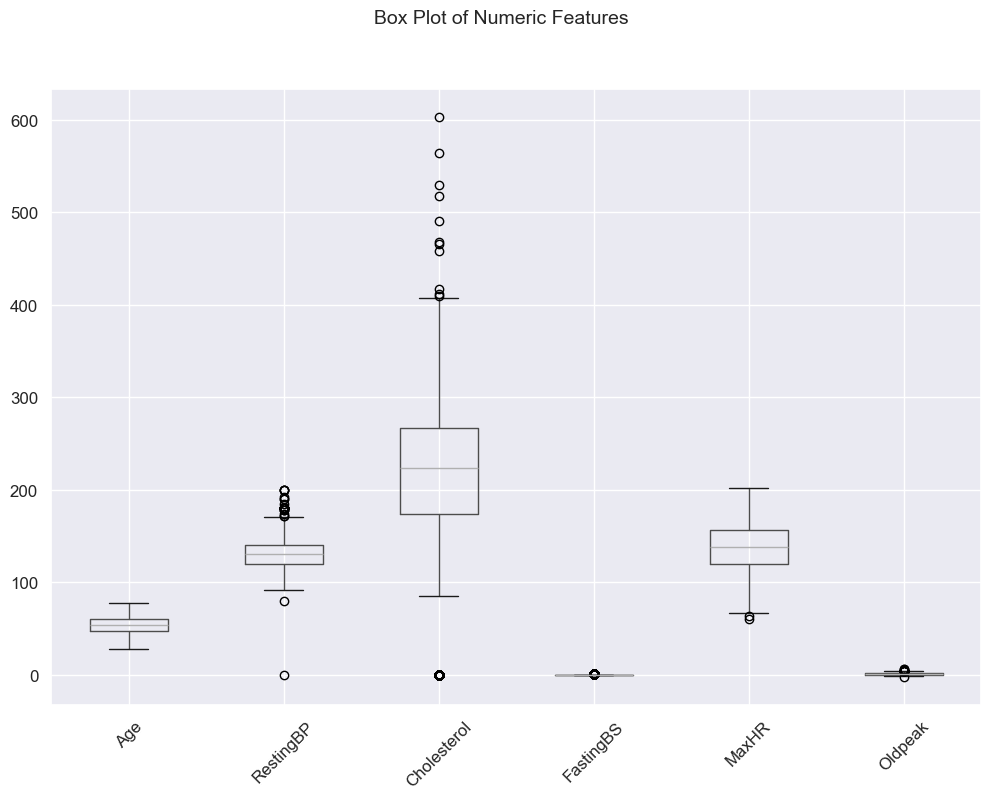

In [14]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df[numerical_cols].boxplot()
#df[numerical_cols].boxplot(column = numerical_cols[0])
plt.suptitle("Box Plot of Numeric Features", fontsize = 14)
plt.xticks(rotation=45) 
plt.show()

### 5. Target Distribution and Class Imbalance

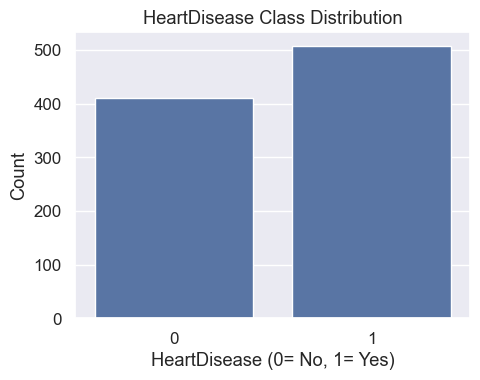

In [15]:
# Target Distribution and Class Imbalance
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("HeartDisease Class Distribution")
plt.xlabel("HeartDisease (0= No, 1= Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [16]:
df[target_col].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

### 6. Categorical Feature Exploration

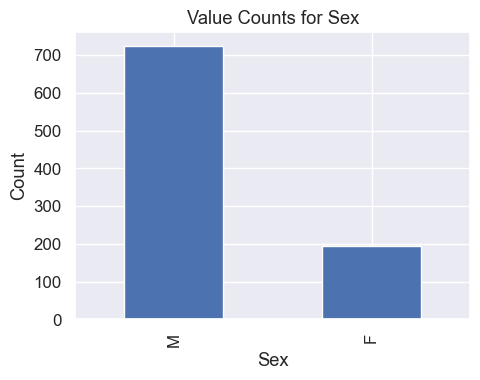

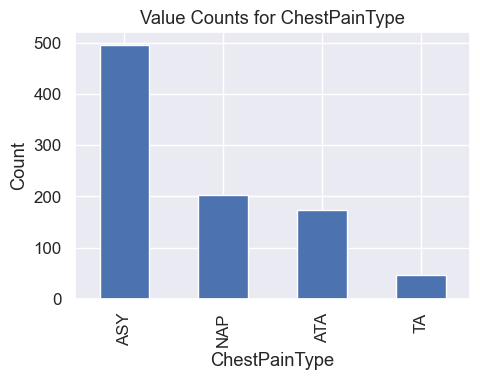

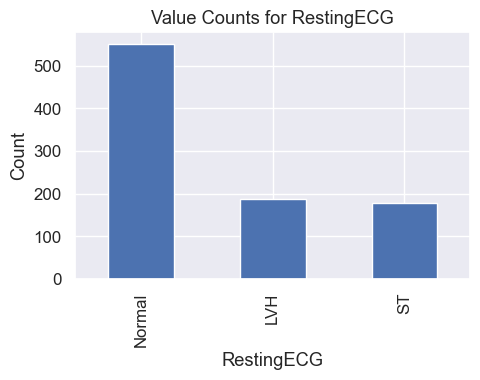

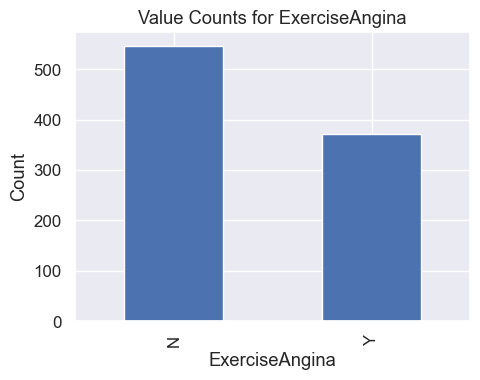

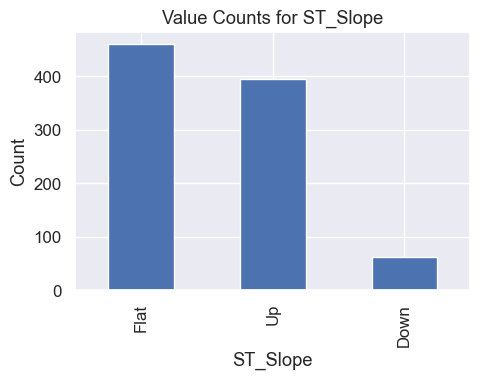

In [17]:
# Categorical Feature Exploration
for c in categorical_cols:  
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind="bar")
    plt.title(f"Value Counts for {c}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### 7. Relationship between Features and Target
We will first visualize numeric features against the target and then look at correlation

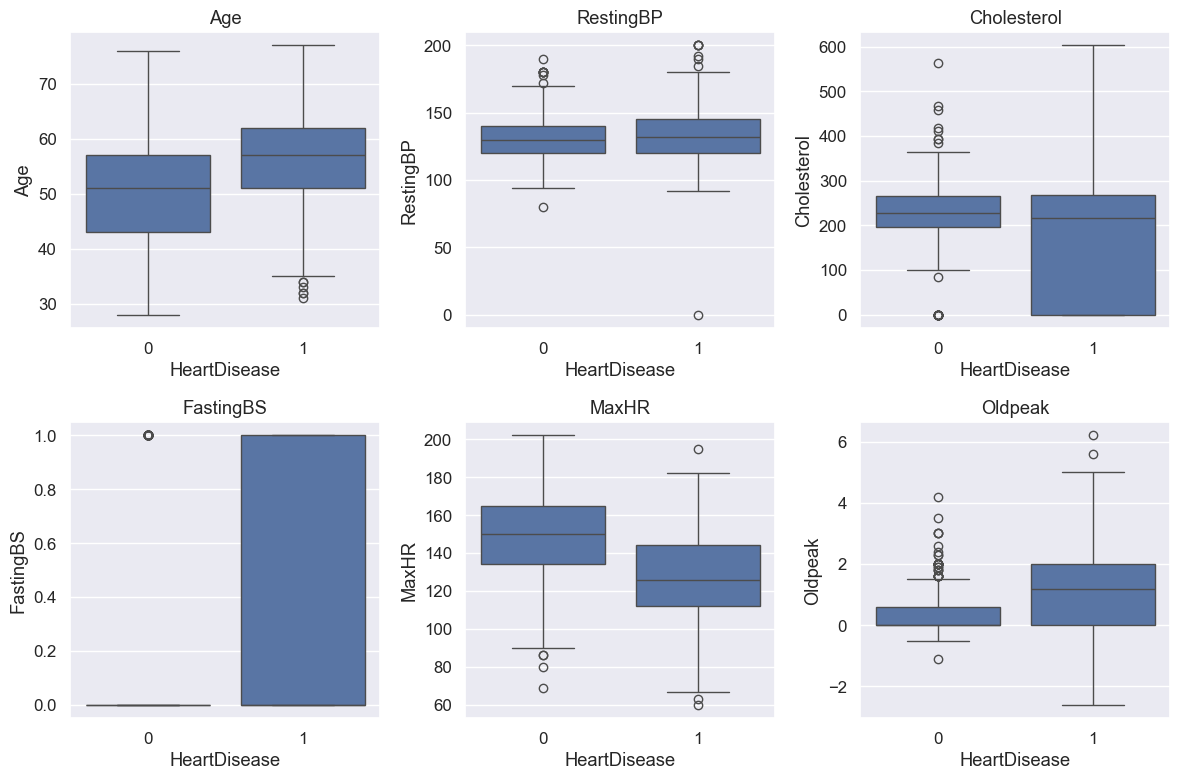

In [18]:
# Boxplots of numeric features split by HeartDisease  
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[target_col], y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Identify Indsists : large difference in distribution between target classes often signal strong predictive potential. If the distributions are almost identical, that feature may be less usefull on its own.

### 7.1 Pairplot for a subset of features

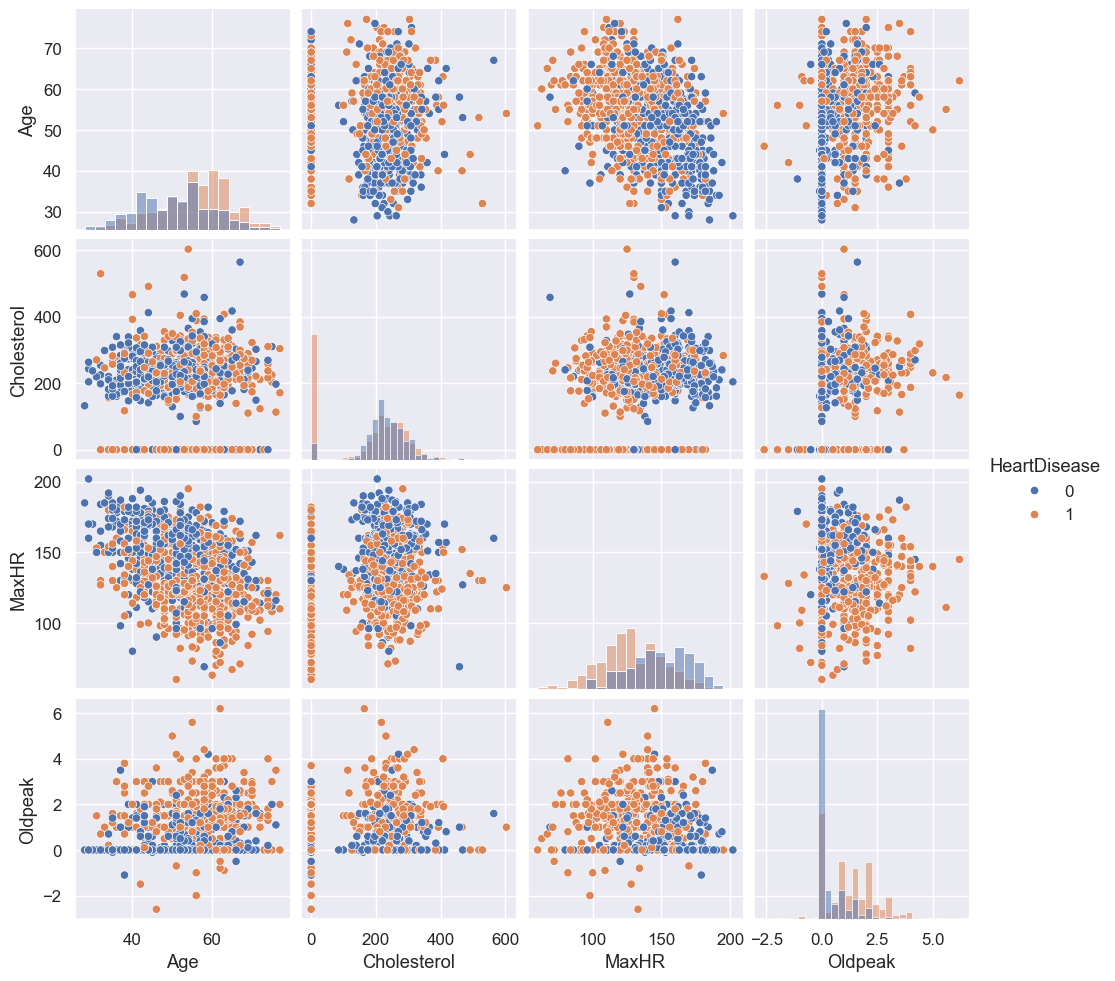

In [19]:
# Pairplot for a subset of features
sns.pairplot(df[["Age","Cholesterol","MaxHR","Oldpeak","HeartDisease"]], hue="HeartDisease", diag_kind="hist")
plt.show()

### 7.2 Corellation Matrix and Hitmap

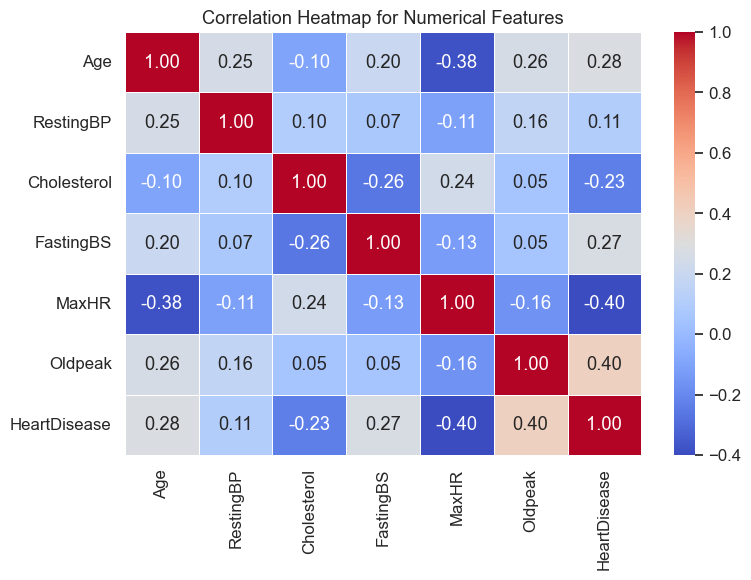

In [23]:
# Corellation Matrix and Hitmap  
corr_matrix = df[numerical_cols + [target_col]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()

In [24]:
corr_matrix[target_col].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

### 7.3 Categorical Features Vs Target


Proportion of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


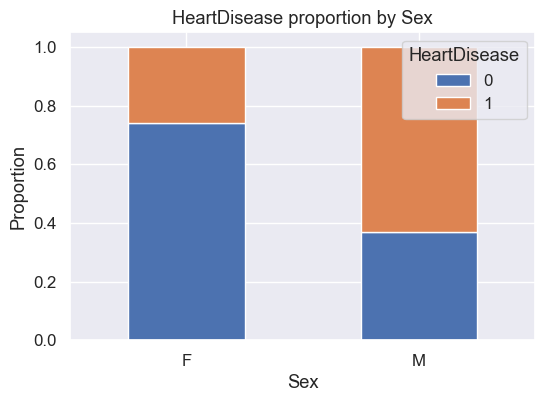


Proportion of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


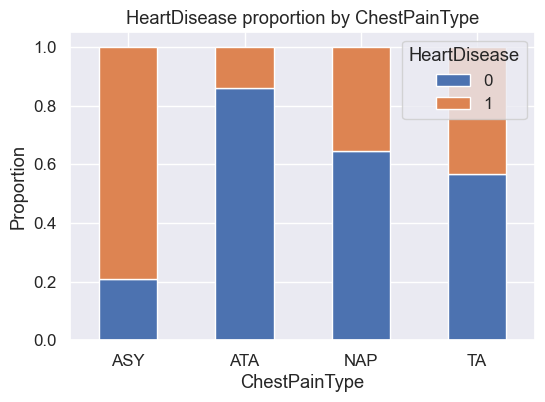


Proportion of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


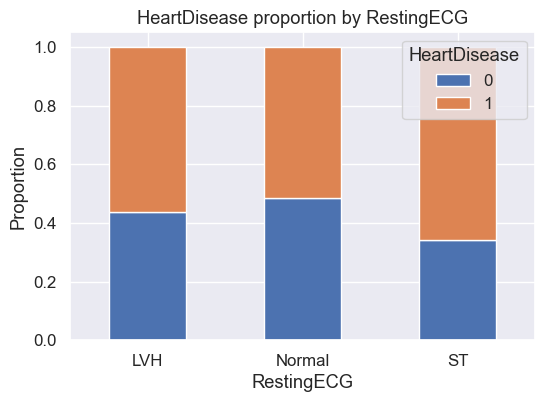


Proportion of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


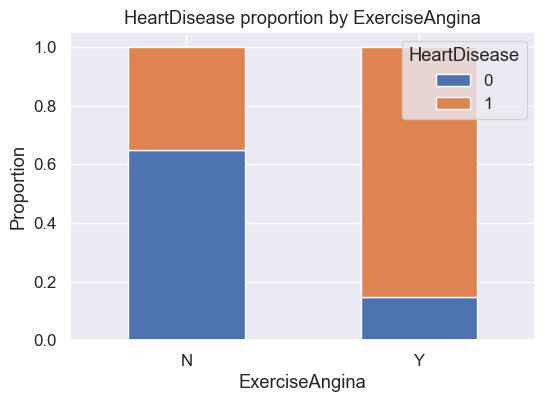


Proportion of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


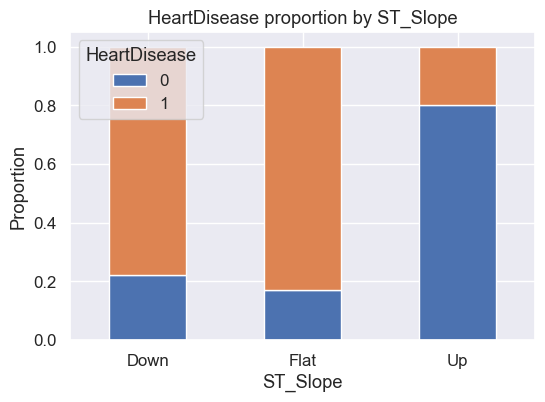

In [25]:
# Categorical Features Vs Target 
for c in categorical_cols: 
    ct = pd.crosstab(df[c], df[target_col], normalize="index")
    print(f"\nProportion of HeartDisease within {c}")
    display(ct)
    ct.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"HeartDisease proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.show()